## 1 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

As 
- E 
$$E(configuration) = -J \sum_{<i,j>} S_i S_j$$
- m
$$m(configuration) = \frac{1}{N} \sum_{i} S_i$$
- specific heat
$$C = \frac{1}{NT^2}(<E^2> - <E>^2)$$
- susceptibility 
$$χ = \frac{1}{NT}(<M^2> - <|M|>^2)$$

I define the required function in the following block

In [2]:
# N by N lattice 
def gen_lattice(N):
  lattice = np.random.choice([1,-1], size=(N,N))
  return lattice

# Energy
def Energy(config):
  Energy = 0
  L = len(config)

  for i in range(0,len(config)):
    for j in range(0,len(config)):
      S = config[i,j]
      Neighbour_sum = config[(i+1)%L,j] + config[(i-1)%L,j] + config[i,(j+1)%L] + config[i,(j-1)%L]
      # I divide Neighbour_sum by 4 to deal with overcounting 
      Energy += -S*Neighbour_sum/2
      
  return float(Energy) 

# magnetization
def m(config,L):
  m = np.sum(config)/(L*L)
  return m

# specific_heat
def specific_heat(L,T,Energy_list):
  N = L**2
  Energy_mean = np.mean(Energy_list)
  Energy_square_mean =np.mean(np.square(Energy_list)) 
  return 1/(N*T**2)*(Energy_square_mean - Energy_mean**2)

# susceptibility
def susceptibility(L,T,M_list):
  N = L**2
  m_mean = np.mean(np.abs(M_list))
  m_square_mean = np.mean(np.square(M_list)) 
  return (m_square_mean - m_mean**2)/(N*T)

Define a function for configuration changing 

In [3]:
# 2. Randomly change a spin and flip the spin 

def config_change(config,T):
  N= int(len(config))

  for j in range(N):
    for k in range(N):
      a,b = np.random.randint(0,N),np.random.randint(0,N)
      S = config[a,b]

      Neighbour_sum = config[(a+1)%N,b] + config[(a-1)%N,b] + config[a,(b+1)%N] 
      + config[a,(b-1)%N]
      delta_E = 2*S*Neighbour_sum

      if (delta_E < 0) or (np.random.rand() < np.exp(-delta_E/T)):
        config[a,b] *= -1 

  return config

I then define **Q1_return** function, which would return list that contained all energy and absolute magnetization values for plotting graph.(See the list1 and list2 below to see how I store the values)

In [4]:
def Q1_return(Temperature,iteration,L):
  Energy_list = []
  abs_m_list = []
  lattice = gen_lattice(L)

  for i in range(iteration):
    lattice = config_change(lattice,Temperature)
    Energy_list.append(Energy(lattice))
    abs_m_list.append(np.abs(m(lattice,L)))

  return Energy_list, abs_m_list

In [5]:
iterations = 5000
temperature_list = [0.5,2.27,4]
size = 4
list1 = []
list2 = []

for i in range(3):
  energy_list, return_abs_list = Q1_return(temperature_list[i],iterations,16)
  list1.append(energy_list)
  list2.append(return_abs_list)

"""
The structure of list1 is like 
[[Energy values of 5000 configuration at T = 0.5], 
 [Energy values of 5000 configuration at T = 2.27], 
 [Energy values of 5000 configuration at T = 4]]

The structure of list2 is like 
[[Energy values of 5000 configuration at T = 0.5], 
 [Energy values of 5000 configuration at T = 2.27], 
 [Energy values of 5000 configuration at T = 4]]

"""

'\nThe structure of list1 is like \n[[Energy values of 5000 configuration at T = 0.5], \n [Energy values of 5000 configuration at T = 2.27], \n [Energy values of 5000 configuration at T = 4]]\n\nThe structure of list2 is like \n[[Energy values of 5000 configuration at T = 0.5], \n [Energy values of 5000 configuration at T = 2.27], \n [Energy values of 5000 configuration at T = 4]]\n\n'

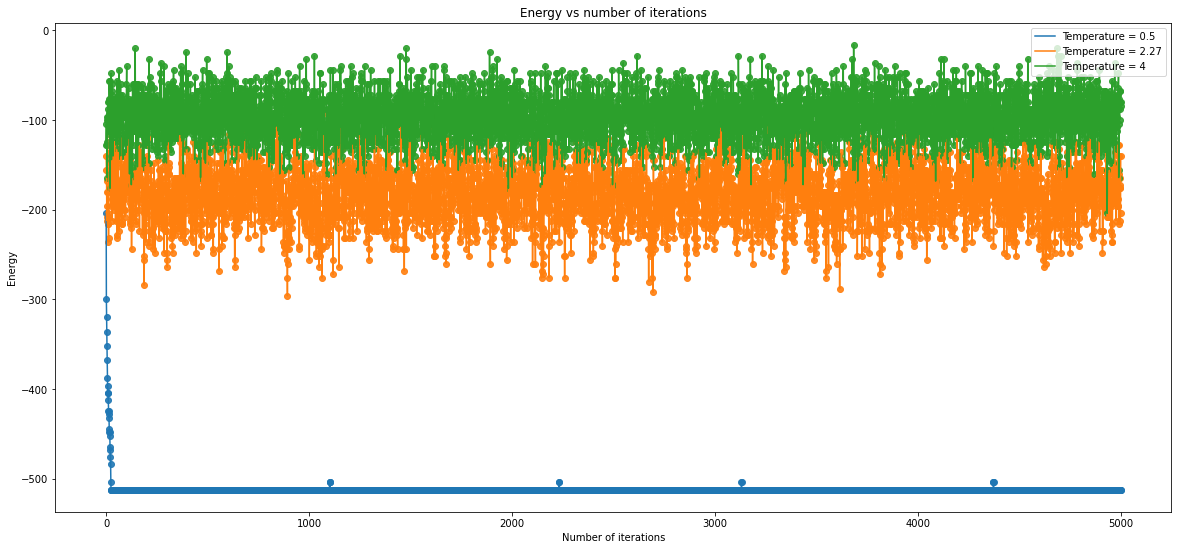

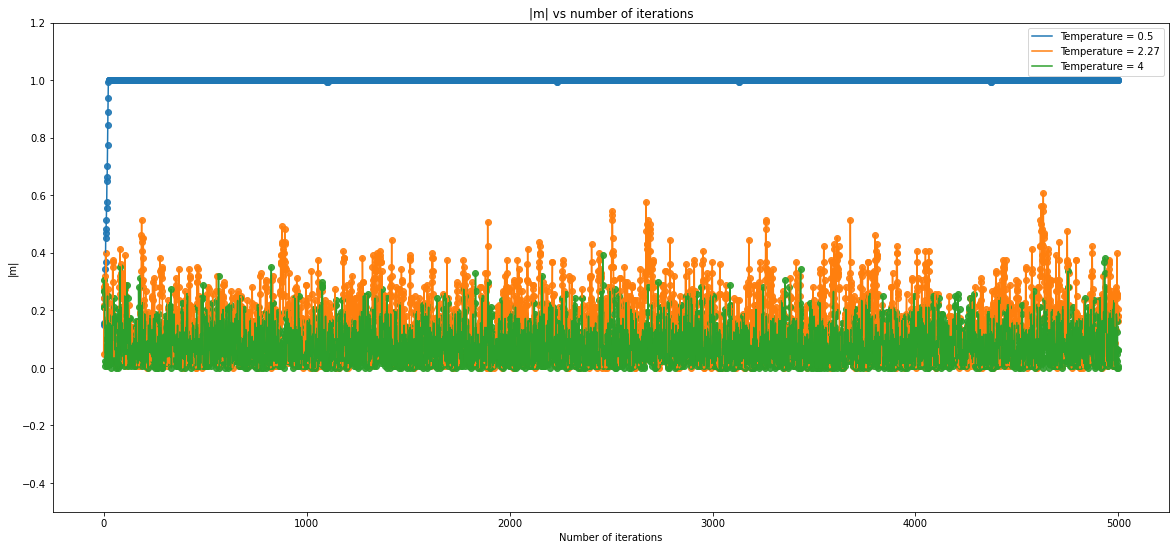

In [9]:
plt.figure(figsize=(20,9))
for i in range(3):
  plt.plot([i for i in range(iterations)],list1[i],label="Temperature = {T1}".format(T1=str(temperature_list[i])))
  plt.scatter([i for i in range(iterations)],list1[i],alpha=0.9)


plt.xlabel("Number of iterations")
plt.ylabel("Energy")
plt.title("Energy vs number of iterations")
plt.legend()
plt.show()

plt.figure(figsize=(20,9))
for i in range(3):
  plt.plot([i for i in range(iterations)],list2[i],label="Temperature = {T1}".format(T1=str(temperature_list[i])))
  plt.scatter([i for i in range(iterations)],list2[i],alpha=0.9)

plt.xlabel("Number of iterations")
plt.ylabel("|m|")
plt.ylim(-0.5,1.2)
plt.title("|m| vs number of iterations")
plt.legend()
plt.show()

We can see the energy and absolute magnetization fluctuates around a certain values after around 500 iterations. 

## 2

The steps of generating graph in question 2 are 
1. Generate lattice lattice 
2. Keep on flipping the equilibrium lattice, then collect the corresponding data of the configurations 
3. At every 100 iterations, I would calculate the mean of that 100 data. Then clear the list and start the iteration again. 
4. After all iterations complete, I would calculate the mean and the standard deviation of the data. 
5. Repeat the 1-4 for different temperature ranging from 0.25 to 4 

For the result of this part, you can refer to my another GitHub Repository - [SRF Ising Model](https://github.com/timlok123/Monte-Carlo-Simulation-on-IsingModel-and-Transverse-Field-Ising-Model)

## 3

The steps of generating graph in question 3 are 
1. Generate absolute magnetization list like question 2 first 
2. Generate 5000 configurations for each temperature. Then randomly pick 5000 sample configurations
3. Perform PCA 


In [ ]:
def mean_at_T_Q3(Temperature,iteration,L):

  #1. Generate equilibrium lattice
  lattice = gen_lattice(L)
  for i in range(500):
    lattice = config_change(lattice,Temperature)

  #2. Keep on running,collect data 
  abs_m_list = []
  return_abs_m_list = []

  for i in range(iteration):
    lattice = config_change(lattice,Temperature)
    abs_m_list.append(np.abs(m(lattice,L)))

    if i%100==0 and i!=0:
      return_abs_m_list.append(np.mean(abs_m_list))
      abs_m_list = []
    
  return return_abs_m_list

In [ ]:
#Generate a new list again
k = 10
iteration = 5000
mean_abs_m_list = []
std_list = []

for a in range(1,17): 
  T = a*0.25
  abs_m_list= mean_at_T_Q3(T,iteration,k) 
  mean = np.mean(abs_m_list)
  mean_abs_m_list.append(mean)

As for 10x10 system, 

- 100 spin-up m:1
- 99 spin-up m:0.98
- 98 spin-up m:0.96
...
- 0 spin-up m:-1 

After rounding the m value, if it is **even**, then we should consider whether the sign of it should be flipped. If it is **old**, it is most likely the magnetization value is positive before.  

In [ ]:
#Prepare data - version 2
print(mean_abs_m_list)
all_list = []
same_t_list = []

for i in mean_abs_m_list:
  for j in range(5000):
    
    sign = 1
    if (round(i*100))%2 ==0:
      sign = np.random.choice([1,-1]) 
    
    flip_no = (100 - sign*round(i*100))//2

    flip_list = a = np.random.randint(100, size=flip_no)
    lattice = np.ones(100)

    for k in a:
      lattice[k] =-1
    same_t_list.append(lattice)

  all_list.append(same_t_list)
  same_t_list = []
  
print(np.array(all_list).shape)

x = []
t = []
# Randomly pick 5000 configuration
for i in range(5000):
  a = np.random.randint(16)
  b = np.random.randint(5000)
  x.append(all_list[a][b])
  t.append(a*0.25)

x = np.array(x)
t = np.array(t)


[1.0, 0.9999795918367348, 0.9991308547181248, 0.9902968680541524, 0.9441976965043443, 0.7725742170135381, 0.4015279046271974, 0.27545342493433017, 0.2170150333400687, 0.183672297433825, 0.17070030309153367, 0.15527411598302687, 0.13796221458880584, 0.1374912911699333, 0.12873336027480298, 0.12665463730046475]
(16, 5000, 100)


Text(0.5, 1.0, 'Eigenvalue of covarance matrix')

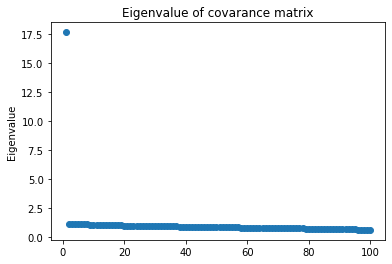

In [ ]:
z = np.zeros((5000,100))
x_mean = np.mean(x,axis=0)
x_std = np.std(x,axis=0,ddof=0)

for i in range(100):
  z[:,i]=(x_mean[i]-x[:,i])/x_std[i]

# Compute the covariance matrix 
cov = np.cov(z,rowvar=False)

# Compute UPU^{-1}
from numpy import linalg as la
U,sigma,VT=la.svd(cov)


n = []
for i in range(1,101):
  n.append(i)
plt.scatter(n[0:100],sigma[0:100])
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue of covarance matrix")


In [ ]:
#Finding the principal components
def reduce_system(U,dimension):
    U_reduced=U[ : , :dimension]
    reduced_vec=np.dot(z,U_reduced)
    var=np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec,var

[[-6.09469115e+00 -2.43531816e-01]
 [-2.43648322e+00  1.60078202e+00]
 [ 6.93344933e+00 -4.33852281e-03]
 ...
 [-7.05173048e-01  2.88996932e+00]
 [-5.38485526e-01  7.63776967e-01]
 [-5.93889619e+00 -1.52796948e+00]]


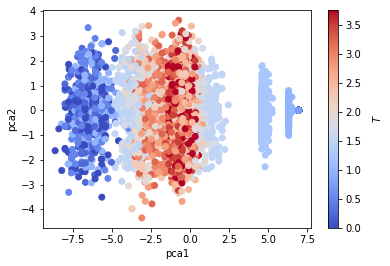

In [ ]:
reducevec, vari = reduce_system(U,2)
print(reducevec)
plt.scatter(reducevec[:,0],reducevec[:,1],c=t,cmap="coolwarm") 
plt.xlabel('pca1')
plt.ylabel('pca2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)

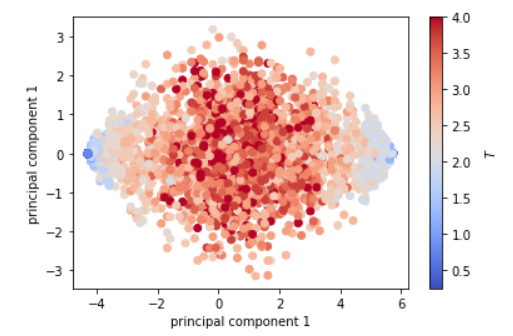

The graph above is copy from PCA_Ising model 

What are the difference between 2 graphs and why are there difference? 
- Difference: For my work, different regions are **discrete** while the image from PCA_Ising_model are like continuous patches that high temperature at the centre while low temperature at the 2 end

- Reason: It is because the m values we used for generating the configurations is discrete, while the images in example is generated by Metropolis algorithm, which is continuous. So no space would be in between different regions 